In [23]:
import cv2
import imutils
import pytesseract
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

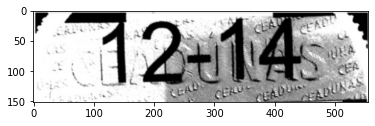

In [6]:
image = cv2.imread('input_image.jpg')
plt.imshow(image)
plt.show()


In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

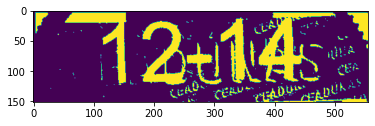

In [8]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)
plt.show()

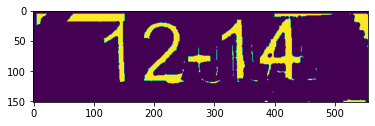

In [10]:
#Applying distance transform to the gray image
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
dist = (dist * 255).astype("uint8")
plt.imshow(dist)
dist = cv2.threshold(dist, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(dist)

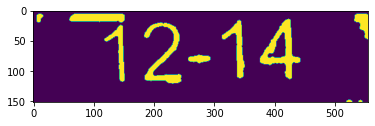

In [12]:
#Applying opening morphological operation (ie. dilation followed by erosion)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opening = cv2.morphologyEx(dist, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

In [17]:
cnts = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
chars = []
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    if w >= 35 and h >= 100:
        chars.append(c)

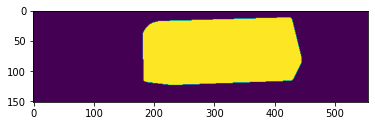

In [20]:
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.drawContours(mask, [hull], -1, 255, -1)
mask = cv2.dilate(mask, None, iterations=2)
plt.imshow(mask)
final = cv2.bitwise_and(opening, opening, mask=mask)

In [24]:
options = "--psm 8 -c tessedit_char_whitelist=0123456789"
text = pytesseract.image_to_string(final, config=options)
print(text)
# show the final output image
cv2.imshow("Final", final)
cv2.waitKey(0)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.